### Problem Statement:
### This assignment aims to utilize Long Short-Term Memory (LSTM) algorithms to perform next word prediction on a given dataset. Next word prediction involves predicting the next word in a sequence of text based on the preceding words. By implementing LSTM (Long Short-Term Memory) networks, to learn how to process sequential data and capture long-term dependencies for predicting the next word in a sentence.

#### The code provided bellow : Loads the text file and reads its content. Displaying the first 1000 characters can be helpful for verifying if the file is loaded correctly.

In [1]:
# Specify the path to your text file
file = open('/kaggle/input/lstm-data/LSTM DATA.txt', encoding='utf8')

#This line of code opens the specified text file 
# The encoding as UTF-8, which is commonly used for handling text files containing a variety of characters from different languages

In [2]:
lines = file.readlines()

# Close the files
file.close()

In [3]:
lines [:5]

['\ufeffThe Project Gutenberg eBook of Pride and Prejudice\n',
 '    \n',
 'This ebook is for the use of anyone anywhere in the United States and\n',
 'most other parts of the world at no cost and with almost no restrictions\n',
 'whatsoever. You may copy it, give it away or re-use it under the terms\n']

In [4]:
# Join the lines into a single string
df = ' '.join(lines)

# Step 1: Removing unnecessary information
start_index = df.find("The Project Gutenberg eBook of Pride and Prejudice")
df = df[start_index:]


In [5]:
# Remove unwanted characters
df = df.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“', '').replace('”', '')

In [6]:
df[:500]

'The Project Gutenberg eBook of Pride and Prejudice      This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  '

#### Preprocessing the text data for further analysis. Let me break down what each step does:

   #### 1) Removing unnecessary information: This step finds the index of a specific string ("The Project Gutenberg eBook of Pride and Prejudice") and removes everything before it. This could be useful if you want to remove any metadata or headers from your text.

   #### 2) Tokenizing the text into words: This splits the text into individual words based on whitespace. This step is essential for text processing tasks.

  ####  3) Lowercasing the text: Converting all words to lowercase ensures that the model treats words like "Word" and "word" as the same, which helps in avoiding duplication.

  ####  4) Removing punctuation and special characters: This step uses regular expressions to remove any characters that are not alphanumeric (letters or numbers). It helps clean up the text and standardize it for analysis.

#### Finally, the processed text is joined back together into a single string. This preprocessed text can now be used for tasks like next-word prediction. 

In [7]:
 # import the libraries 're' for regular expressions 
import re

# Step 3: Lowercasing the text
df = df.lower() 

# Additional cleaning using regex
df = re.sub(r'\ufeff', '', df) 

df = re.sub(r'[“”"‘’]', '', df)


In [8]:
# Displaying the first 500 characters can be helpful for verifying if the file is processed correctly.¶
df[:1000]

'the project gutenberg ebook of pride and prejudice      this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever. you may copy it, give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org. if you are not located in the united states, you will have to check the laws of the country where you are located before using this ebook.  title: pride and prejudice   author: jane austen  release date: june 1, 1998 [ebook #1342]                 most recently updated: april 14, 2023  language: english  credits: chuck greif and the online distributed proofreading team at http://www.pgdp.net (this file was produced from images available at the internet archive)   *** start of the project gutenberg ebook pride and prejudice ***                                 [illustration:                               george allen                  

In [9]:
# To find the length of the processed text, you can simply use the len() function. 
len(df)

743529

  ####  Tokenization: Using the Tokenizer class from Keras,initialize a tokenizer object. Specify the maximum number of words (num_words) and a set of characters to filter out (filters). In this case removing punctuation characters and special characters commonly found in text. Additionally, you set lower=True to convert all words to lowercase during tokenization.

####    Fit Tokenizer on Text: You call the fit_on_texts() method of the tokenizer, passing the preprocessed text as input. This updates the tokenizer's internal vocabulary based on the text provided.

####    Generate Word Indices: After fitting the tokenizer, you retrieve the word index, which is a dictionary mapping words to their respective integer indices.

##### This prepares your text data for further processing, such as converting text sequences to sequences of integers based on these word indices.

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([df])
word_index = tokenizer.word_index

2024-04-16 18:52:51.473692: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 18:52:51.473834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 18:52:51.615436: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
import pickle

#### Save the tokenizer as a token.pkl gormat externally, Useing pickle libraries.
pickle.dump(tokenizer,open('token.pkl','wb'))

In [12]:
len(word_index) # Check the vocabulary size
# The length of word_index gives you the number of unique words in your preprocessed text. 
# You can obtain this length using the len() function

7172

#### This process effectively creates sequences of fixed length from the tokenized text data, which is often used as input data for models like recurrent neural networks (RNNs) or long short-term memory networks (LSTMs) in tasks like sequence prediction or language modeling.

In [13]:
# Convert text sequences to sequences of integers

input_sequences = [] # This initializes an empty list input_sequences where we will store the sequences of integers.

for sentence in df.split('. '):  # This loop iterates over each sentence in the text data. 
    # The assumption here is that df contains the text data, and split('. ') is used to split the text into sentences based on the period followed by a space, 
    # which is a common way to denote the end of a sentence. You may need to adjust this based on the structure of your text data.
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0] #Inside the loop, each sentence is tokenized into a sequence of integers using the texts_to_sequences method of the tokenizer object. 
    # This method converts each word in the sentence to its corresponding integer index based on the vocabulary learned during tokenization.
    
    for i in range(1, len(tokenized_sentence)):
        input_sequences.append(tokenized_sentence[:i+1])
        # For each tokenized sentence, this loop generates multiple input-output pairs for training the model. 
        # It starts from the second word (index 1) and iterates up to the length of the tokenized sentence.
        # At each iteration, it creates a sequence of integers from the beginning of the sentence up to the current word index (i+1). 
        # This sequence represents the input, and the next word after this sequence represents the output. 
        # These input-output pairs are then appended to the input_sequences list.

### After running this code, input_sequences will contain sequences of integers representing input-output pairs for training the model. Each sequence consists of an increasing number of words from the beginning of a sentence, and the final element of each sequence is the next word in the sentence. These sequences can be used to train an LSTM or similar model for next word prediction.

In [14]:
input_sequences [0:15]

[[1, 182],
 [1, 182, 391],
 [1, 182, 391, 1005],
 [1, 182, 391, 1005, 3],
 [1, 182, 391, 1005, 3, 299],
 [1, 182, 391, 1005, 3, 299, 4],
 [1, 182, 391, 1005, 3, 299, 4, 951],
 [1, 182, 391, 1005, 3, 299, 4, 951, 41],
 [1, 182, 391, 1005, 3, 299, 4, 951, 41, 1005],
 [1, 182, 391, 1005, 3, 299, 4, 951, 41, 1005, 23],
 [1, 182, 391, 1005, 3, 299, 4, 951, 41, 1005, 23, 21],
 [1, 182, 391, 1005, 3, 299, 4, 951, 41, 1005, 23, 21, 1],
 [1, 182, 391, 1005, 3, 299, 4, 951, 41, 1005, 23, 21, 1, 508],
 [1, 182, 391, 1005, 3, 299, 4, 951, 41, 1005, 23, 21, 1, 508, 3],
 [1, 182, 391, 1005, 3, 299, 4, 951, 41, 1005, 23, 21, 1, 508, 3, 549]]

In [15]:
max_len = max([len(x) for x in input_sequences])
max_len

# This code calculates the maximum length of the input sequences.
# max_len: This is the maximum length that you want the sequences to be padded or truncated to. 
# All sequences longer than maxlen will be truncated, and sequences shorter than maxlen will be padded.

152

In [16]:
# Pad the sequences This code snippet pads the input sequences to ensure that they all have the same length.
padded_input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

In [17]:
padded_input_sequences

array([[   0,    0,    0, ...,    0,    1,  182],
       [   0,    0,    0, ...,    1,  182,  391],
       [   0,    0,    0, ...,  182,  391, 1005],
       ...,
       [   0,    0,    0, ...,    2,  230,  126],
       [   0,    0,    0, ...,  230,  126,  524],
       [   0,    0,    0, ...,  126,  524, 1753]], dtype=int32)

In [18]:
len(padded_input_sequences)

124648

In [19]:
import numpy as np
# Create predictors and labels
X = np.array([x[:-1] for x in padded_input_sequences])
y = np.array([x[-1] for x in padded_input_sequences])

# Print the shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (124648, 151)
Shape of y: (124648,)


In [20]:
import tensorflow as tf

# Convert y to one-hot encoding
num_words = len(word_index) + 1
y_one_hot = tf.keras.utils.to_categorical(y, num_classes=num_words)


#### In summary, using one-hot encoding for categorical labels ensures compatibility with loss functions, facilitates meaningful comparison between model predictions and ground truth labels, and helps in stable training and effective learning of neural network models, especially for classification tasks.

In [21]:
y_one_hot.shape

(124648, 7173)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM,BatchNormalization

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, BatchNormalization, Dense

model = Sequential()
model.add(Embedding(input_dim=15000, output_dim=100, input_shape=(151,)))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(64))
model.add(BatchNormalization())
model.add(Dense(7173, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 151, 100)       │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 151, 256)       │       365,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 151, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 151, 128)       │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 151, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7173)           │       466,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,578,597 (9.84 MB)

 Trainable params: 2,578,469 (9.84 MB)

 Non-trainable params: 128 (512.00 B)

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [26]:
# Train the model
batch_size = 128
epochs = 50

history = model.fit(X, y_one_hot, batch_size=batch_size, validation_split=0.2, epochs=epochs)

Epoch 1/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 58s 66ms/step - accuracy: 0.0372 - loss: 7.6724 - val_accuracy: 0.0744 - val_loss: 6.1720
Epoch 2/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.0917 - loss: 5.7678 - val_accuracy: 0.1043 - val_loss: 5.8604
Epoch 3/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.1242 - loss: 5.3508 - val_accuracy: 0.1183 - val_loss: 5.7396
Epoch 4/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.1413 - loss: 5.0603 - val_accuracy: 0.1260 - val_loss: 5.6987
Epoch 5/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.1544 - loss: 4.8184 - val_accuracy: 0.1308 - val_loss: 5.7217
Epoch 6/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.1683 - loss: 4.6107 - val_accuracy: 0.1320 - val_loss: 5.7868
Epoch 7/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.1773 - loss: 4.4435 - val_accuracy: 0.1289 - val_loss: 5.8767
Epoch 8/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.1908 - loss: 4.2647 - 

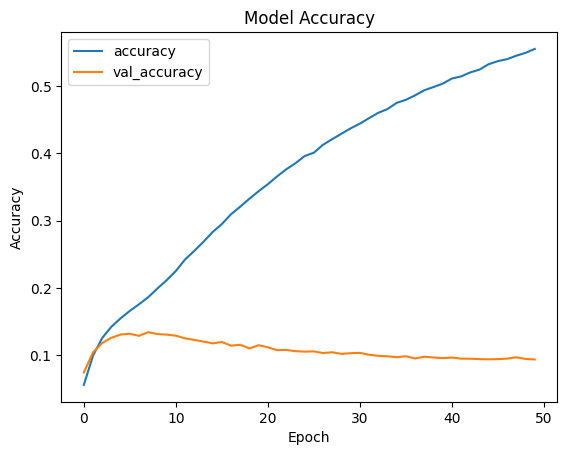

In [27]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [28]:
model.save('next_word_predictor.h5')

In [31]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
import time
import numpy as np

text = "you may copy it, give it"

for i in range(25):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=3, padding='pre')
  # predict
  predicted_index = np.argmax(model.predict(padded_token_text))
    
  for word,index in tokenizer.word_index.items():
    if index == predicted_index:
      text = text + " " + word
      print(text)
      time.sleep(2)
  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
you may copy it, give it a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
you may copy it, give it a better
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
you may copy it, give it a better perverseness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
you may copy it, give it a better perverseness of
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
you may copy it, give it a better perverseness of the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
you may copy it, give it a better perverseness of the park
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
you may copy it, give it a better perverseness of the park intended
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
you may copy it, give it a better perverseness of the park intended only
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
you may copy it, give it a better perverseness of the park intended only to
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
you may copy it, give it a better perverseness of the park intended only to express
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
you may co

#### Tuning the Hyperparameters


In [32]:
!pip install scikeras==0.12.0

In [33]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Define the LSTM model
# Define the LSTM model
def create_lstm_model():
    model.add(Embedding(input_dim=15000, output_dim=100, input_shape=(151,)))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(rate=0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(rate=0.2))
    model.add(LSTM(64))
    model.add(BatchNormalization())
    model.add(Dense(7173, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

In [34]:
# create model
model = KerasClassifier(model=create_lstm_model, verbose=0)

In [35]:
# Define hyperparameters for grid search
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [64, 128, 256],
    'epochs': [50, 100],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

In [36]:
grid_result = grid.fit(X,y_one_hot)

2024-04-16 19:45:59.675211: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 19:45:59.675302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 19:45:59.678082: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 19:45:59.792379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 19:45:59.792529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factor

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))